In [222]:
#Analysis
#City type, fare and number of drivers are highly correlated variables
#Average rural fares are higher than average urban fares suggesting longer distance rides or higher prices due to scarcity in the # of fares
#Rural areas has lower percentages but higher fares and rides compared to urban areas which higher percentage of crivers but lower number of rides


#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import csv

In [223]:
#Import data
city_df = pd.read_csv("generated_data/city_data.csv")
ride_df = pd.read_csv("generated_data/ride_data.csv")

In [224]:
city_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [225]:
ride_df.head()

,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [226]:
#set index as city
city_df.set_index(["city"], inplace = True)
city_df.head()

,driver_count,type
city,,
Tammyburgh,11,Urban
Melissaborough,15,Urban
Port Brianborough,62,Urban
New Katherine,68,Urban
Lake Charlesside,65,Urban


In [227]:
city_df.count()

driver_count    126
type            126
dtype: int64

In [228]:
#set index as city
ride_df.set_index(["city"], inplace = True)

In [229]:
ride_df.head()

,date,fare,ride_id
city,,,
Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [230]:
#Merge cityand ride dataframes
all_data_df = city_df.merge(ride_df, how = "inner", left_index = True, right_index = True)

In [231]:
all_data_df.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Adamschester,27,Suburban,2017-01-02 16:19:03,31.09,7079690106388
Adamschester,27,Suburban,2017-01-01 23:25:56,35.95,8549491628017
Adamschester,27,Suburban,2017-01-01 23:22:31,12.68,3026425788351
Adamschester,27,Suburban,2017-01-01 13:43:33,48.33,5433192651081
Adamschester,27,Suburban,2017-01-01 04:06:31,12.97,1970667817299


In [232]:
#Find average fare per city
average_fare = all_data_df.groupby("city").fare.mean().reset_index()
#total rides per city
total_rides = all_data_df.groupby("city").ride_id.count().reset_index()

In [233]:
average_fare.head()
average_fare['Average_fare'] = round(average_fare['fare'],2)
average_fare.set_index(["city"], inplace = True)
average_fare.head()

,fare,Average_fare
city,,
Adamschester,29.594444,29.59
Alexisfort,27.366970,27.37
Amberberg,28.624375,28.62
Anthonyfurt,29.491176,29.49
Boyleberg,32.396000,32.40


In [234]:
total_rides.set_index(["city"], inplace = True)
#Rename column
total_rides.rename(columns = {'ride_id': 'Total_Number_of_Rides'}, inplace = True)
total_rides.head()

,Total_Number_of_Rides
city,
Adamschester,9
Alexisfort,33
Amberberg,16
Anthonyfurt,17
Boyleberg,5


In [235]:
#Merge all data by city index
merge1 = average_fare.merge(total_rides, how = "inner", left_index = True, right_index = True)

In [236]:
city_summarized_df = merge1.merge(city_df, how = 'inner', left_index = True, right_index = True)

In [237]:
#Drop extra columns
city_summarized_df.drop(['fare'], axis = 1, inplace = True)
city_summarized_df.head()

,Average_fare,Total_Number_of_Rides,driver_count,type
city,,,,
Adamschester,29.59,9,27,Suburban
Alexisfort,27.37,33,24,Urban
Amberberg,28.62,16,13,Suburban
Anthonyfurt,29.49,17,17,Suburban
Boyleberg,32.40,5,13,Suburban


In [238]:
city_summarized_df.count()

Average_fare             126
Total_Number_of_Rides    126
driver_count             126
type                     126
dtype: int64

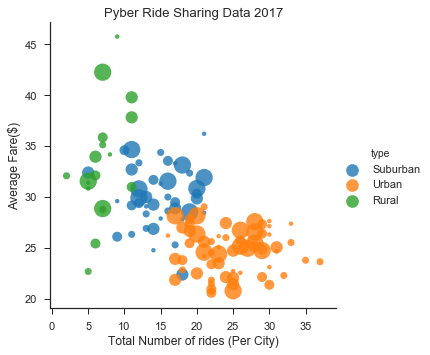

In [239]:
#Create bubble chart
marker_size = [20,50,100,150,300]
bubble = sb.lmplot(data=city_summarized_df, x='Total_Number_of_Rides', y = 'Average_fare', 
                   fit_reg = False, hue = 'type', scatter_kws={"s":marker_size})
plt.title('Pyber Ride Sharing Data 2017')
plt.xlabel('Total Number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.savefig('Pyber_bubble.png')

In [240]:
#Calculate total fare revenue
tot_revenue_df = all_data_df["fare"].sum() 
#Group total fare by city type
tot_fare_df = all_data_df.groupby("type").fare.sum().reset_index()
tot_fare_df.head()

,type,fare
0,Rural,4271.69
1,Suburban,18779.26
2,Urban,40093.25


In [241]:
#Calculate % of total fare by city type
tot_fare_df['Percentage_of_fare_by_city_type'] = round(tot_fare_df['fare']/tot_revenue_df*100,2)
#Format percentage values
tot_fare_df["Percentage_of_fare_by_city_type"] = tot_fare_df["Percentage_of_fare_by_city_type"].map("{:.2f}%".format)
tot_fare_df.head()

,type,fare,Percentage_of_fare_by_city_type
0,Rural,4271.69,6.76%
1,Suburban,18779.26,29.74%
2,Urban,40093.25,63.49%


In [242]:
tot_fare_by_city_type = tot_fare_df["fare"].tolist()
city_type = tot_fare_df["type"].tolist()
colors = ['yellowgreen','lightskyblue', 'lightcoral']

In [243]:
print(city_type)

['Rural', 'Suburban', 'Urban']


In [244]:
print(tot_fare_by_city_type)

[4271.689999999999, 18779.25999999998, 40093.24999999994]


In [245]:
explode = (0.1, 0.1, 0)

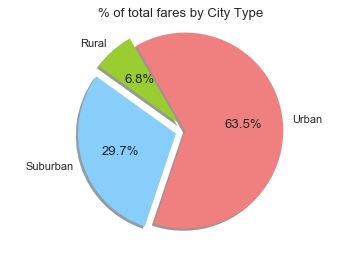

In [246]:
plt.title("% of total fares by City Type")
plt.pie(tot_fare_by_city_type, explode = explode, labels = city_type, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.axis("equal")
plt.show()

In [247]:
#Calculate total number of rides
tot_rides = city_summarized_df["Total_Number_of_Rides"].sum()
#Group total rides by city type
tot_rides_df = city_summarized_df.groupby("type").Total_Number_of_Rides.sum().reset_index()
tot_rides_df.head()

,type,Total_Number_of_Rides
0,Rural,125
1,Suburban,625
2,Urban,1625


In [248]:
tot_rides_by_city_type = tot_rides_df["Total_Number_of_Rides"].tolist()
city_type = tot_rides_df["type"].tolist()
colors = ['yellowgreen','lightskyblue', 'lightcoral']

In [249]:
print(tot_rides_by_city_type)

[125, 625, 1625]


In [250]:
print(city_type)

['Rural', 'Suburban', 'Urban']


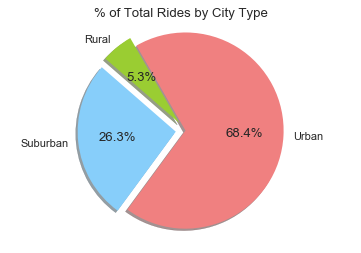

In [251]:
explode = (0.1, 0.1, 0)
plt.title("% of Total Rides by City Type")
plt.pie(tot_rides_by_city_type, explode = explode, labels = city_type, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.axis("equal")
plt.show()

In [252]:
#Group driver total by city type
tot_drivers_df = city_summarized_df.groupby("type").driver_count.sum().reset_index()
tot_drivers_df.head()

,type,driver_count
0,Rural,98
1,Suburban,594
2,Urban,2466


In [253]:
tot_drivers_by_city_type = tot_drivers_df["driver_count"].tolist()
city_type = tot_rides_df["type"].tolist()
colors = ['yellowgreen','lightskyblue', 'lightcoral']

In [254]:
print(tot_drivers_by_city_type)

[98, 594, 2466]


In [255]:
print(city_type)

['Rural', 'Suburban', 'Urban']


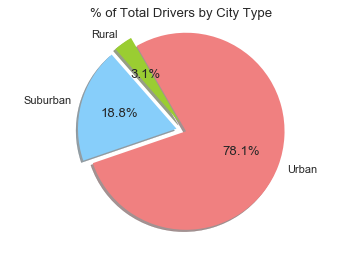

In [256]:
explode = (0.1, 0.1, 0)
plt.title("% of Total Drivers by City Type")
plt.pie(tot_drivers_by_city_type, explode = explode, labels = city_type, colors = colors,
       autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.axis("equal")
plt.show()